# Cardiovascular Disease classification for health company prediction - by Tomi Prasetyo

## Domain Proyek

Menurut data dari WHO (World Health Organization), kardiovaskular atau penyakit yang berhubungan dengan jantung dan pembuluh darah merupakan penyebab kematian terbanyak di seluruh dunia. Pada tahun 2019 ada sekitar 17,9 juta orang meninggal karena kardiovaskular(https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds)). Sedangkan di Indonesia sendiri, menurut data dari Riset Kesehatan Dasar(Riskesdas) yang di kutip dari kementerian kesehatan, Setidaknya, 15 dari 1000 orang, atau sekitar 2.784.064 individu di Indonesia menderita penyakit jantung(http://p2ptm.kemkes.go.id/kegiatan-p2ptm/pusat-/hari-jantung-sedunia-world-heart-day-your-heart-is-our-heart-too).
Berdasarkan data tersebut tentu diperlukan deteksi dini untuk menangantisipasi peningkatan penyakit jantung pada pasien, yang nantinya dapat digunakan oleh perusahaan yang bergerak di bidang kesehatan maupun rumah sakit, sehingga bisa dilakukan tindakan pencegahan dan perawatan.


## Bussiness Understanding

Tentu saat ini rumah sakit sudah dilengkapi dengan alat yang dapat untuk merekam data berbagai kondisi dari pasien.
Dengan data yang banyak dari berbagai rumah sakit maupun institusi yang tersedia di internet dapat digunakan untuk menyusun algoritma machine learning dalam hal klasifikasi apakah kemungkinan seorang pasien mempunyai peluang untuk memiliki masalah jantung dan pembuluh darah.

Dengan sebuah sistem prediksi yang akurat, dapat meningkatkan kepercayaan pasien terhadap perusahaan yang bergerak di bidang kesehatan tersebut. Semakin banyak pasien yang mempercayakan kesehatannya kepada perusahaan tersebut, maka income pada perusahaan tersebut akan semakin besar pula.

### Problem Statement

Berdasarkan penjelasan diatas, perusahaan yang bergerak di bidang kesehatan dapat membuat sebuah sistem prediksi untuk mengklasifikasikan kemungkinan seorang pasien menderita kardiovaskular, dan bisa menjawab permasalahan berikut :

- dari semua fitur yang ada fitur apa saja yang punya faktor terbesar sesorang mengidap kardiovaskular?
- Apakah seseorang dengan data kesehatan tertentu diprediksi mempunyai resiko kardiovaskular?

### Goals

Untuk menjawab pertanyaan tersebut, saya akan membuat klasifikasi modelling dengan tujuan atau goals sebagai berikut:

- mengetahui fitur yang berrelasi terhadap klasifikasi kemungkinan kardiovaskular atau tidak.
- Membuat model machine learning yang dapat mengklasifikasikan apakah sesorang kemungkinan dapat mengidap kardiovaskular dengan seakurat mungkin berdasarkan fitur-fitur yang ada.

### Solution Statement

Pada kasus ini, saya akan membuat sebuah sistem prediksi untuk kalsifikasi dengan memnfaatkan algoritma machine learning Random Forest.

Random Forest adalah termasuk kedalam kelompok ensemble, dimana didalamnya terdapat bebrapa kelompok model machine learning sederhana yang secara bersama-sama menghasilkan model yang lebih powerfull.

- model yang akan saya pakai adalah Random Forest Classifier karena kita akan melakukan proses klasifikasi. Model ini pada dasarkan terdiri dari beberapa model Decision Tree(Pohon Keputusan), dimana keluaran dari model diambil dari keluaran mana yang terbanyak.
- Pada model saya mengadopsi teknik Bagging, dimana setiap model Decision Tree akan mengambil fitur secara acak dan setiap model akan menghasilkan keluaran yang berbeda.


## Data Understanding

Data yang akan saya gunakan dalam proyek ini merupakan data yang didapat dari berbagai pengecakan medis dan tersedia secara bebas di situs dataset kaggle (https://www.kaggle.com/sulianova/cardiovascular-disease-dataset)

Dataset ini terdiri dari 70.000 data dengan 11 feature dan 1 label sebagai berikut:

### Load dataset
Setelah dataset kita unduh pada website diatas, kita dapat menyimpannya pada google drive.
Kemudian kita dapat menghubungkan colab dengan Google drive melalui kode dibawah

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
data = "/content/drive/MyDrive/Colab Notebooks/dataset/cardio_train.csv"



### Feature

terdiri dari dua jenis data, yaitu data numerik dan data kategori.

data numerik meliputi : id, age, height, weight, ap_hi dan ap_lo,

sedangkan data kategori meliputi : gender, cholesterol, gluc, alco, active

Berikut penjelasan detail dari feature pada dataset

- id : nomor urut pasien
- age : merupakan umur pasien (dalam satuan hari)
- height : merupakan tinggi pasien (dalam satuan sentimeter)
- weight : merupakan berat badan pasien (dalam satuan kilogram)
- Gender : merupakan jenis kelamin pasien
- ap_hi : merupakan tekanan darah sistolik (dalam satuan mmHg)
- ap_lo : merupakan tekanan darah diastolik (dalam satuan mmHg)
- cholesterol : merupakan kadar kolesterol dalam kategori, yaitu normal, diatas normal dan jauh diatas normal
- gluc : merupakan kadar glucosa dalam kategori, yaitu normal, diatas normal dan jauh diatas normal
- smoke : merupakan data kategori apakah pasien merokok atau tidak
- alco : merupakan data kategori apakah pasien sering mengkonsumsi alkohol atau tidak
- active : merupakan data kategori apakah pasien sering bergerak atau tidak

### Label

Label disini merupakan satu kolom dengan nama kolom "cardio".

Terdiri dari data kategori 0 dan 1, dimana 0 adalah "no cardio (kemungkinan tidak kardiovaskular)" dan 1 adalah "cardio (kemungkinan akan mempunyai kardiovaskular)"

import  Library yang diperlukan. 
Disini saya memakai pandas dan numpy untuk mengolah dataframe, serta matplotlib, seaborn untuk visualisasi.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv(data, sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


## Data Preparation

membaca file apakah ada value missing value

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


Menghilangkan kolom id, karena kolom id tidak ada korelasi dengan proses klasifikasi

In [5]:
df.drop(columns=['id'], inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Merubah value dari atribut "age" menjadi format tahun(jika pada dataframe sebelumnya adalah hari)

In [6]:
df['age'] = round(df['age'] /365)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0




melakukan pengecekan terhadap data duplikat


In [7]:
df.duplicated().sum()

3816

menghapus data yang terduplikasi

In [8]:
df.drop_duplicates(inplace=True)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69996,62.0,1,158,126.0,140,90,2,2,0,0,1,1
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


melihat sebaran data pada target

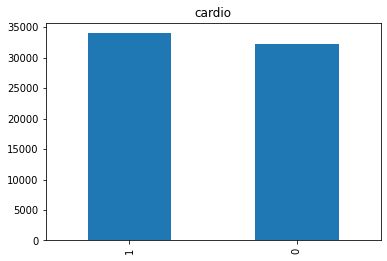

In [9]:
cardio = df['cardio'].value_counts()
cardio.plot(kind='bar', title='cardio')

melakukan pengecekan desripsi data dengan fungsi describe()

In [10]:
df.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000,66184.000000
mean,53.365209,1.357231,164.345114,74.579057,129.304938,97.607186,1.385985,1.238169,0.092772,0.056751,0.797625,0.513614
std,6.807710,0.479187,8.353877,14.613279,158.368179,193.782532,0.692229,0.584137,0.290114,0.231368,0.401773,0.499818
min,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
75%,59.000000,2.000000,170.000000,83.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


Dari data tersebut kita mendapati uraian sebagai berikut :


---



*   minimum umur adalah 30 tahun dan maksimum adalah 65 tahun
*   minimum tinggi adalah 55 cm dan maksimum 250 cm
*   minimum berat adalah 10 kg dan maksimum berat adalah 200 kg
*   minimumm tekanan darah sistolik adalah -150 mmHg dan maksimum 16.020 mmHg
*   minimum tekanan darah diastolik adalah -70 mmHg dan maksimum 11.000 mmHg


dari data tersebut dapat kita simpulkan bahwa ada outlier data, dimana pada tinggi 55 cm dengan usia minimal 30 tahun terlihat begitu rancu, apalagi dengan tekanan darah minimum di -150 dan maksimum 16.020 tentu akan menjadi pertimbangan dari data tersebut.






### Exploratory Data Analysis


outlier data

menghapus data ambigu. yaitu data yang mempunyai rentang terlalu jauh dengan rata-rata data. Ataupun bisa kita katakan data yang tidak sesuai pada kenyataan. Seperti tekanan darah yang terlalu tinggi, ataupun jauh dari batas rendah, tentu itu tidak terjadi di dunia nyata.

Text(0.5, 1.0, 'distribution of Height')

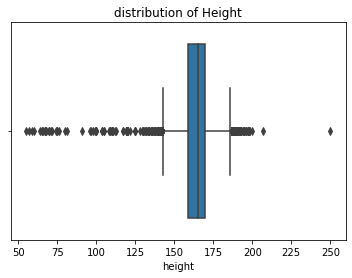

In [11]:
sns.boxplot(x=df['height'])
plt.title('distribution of Height')

Text(0.5, 1.0, 'distribution of Weight')

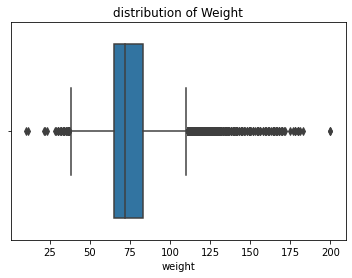

In [12]:
sns.boxplot(x=df['weight'])
plt.title('distribution of Weight')

Text(0.5, 1.0, 'distribution of Systolic blood pressure')

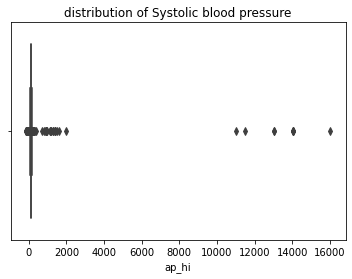

In [13]:
sns.boxplot(x=df['ap_hi'])
plt.title('distribution of Systolic blood pressure')

Text(0.5, 1.0, 'distribution of Dyastolic blood pressure')

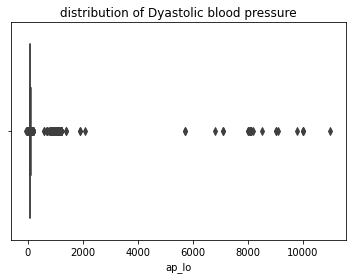

In [14]:
sns.boxplot(x=df['ap_lo'])
plt.title('distribution of Dyastolic blood pressure')

In [15]:
min_height = (df.height <= 140)
print('jumlah tinggi kurang dari 140 cm = ', min_height.sum(), 'data')
max_height = (df.height >= 200)
print('jumlah tinggi lebih dari 200 cm = ', max_height.sum(), 'data')
min_weight = (df.weight <= 35)
print('jumlah berat kurang dari 35 kg = ', min_weight.sum(), 'data')
max_weight = (df.weight >= 120)
print('jumlah berat lebih dari 120 kg = ', max_weight.sum(), 'data')
max_ap_hi = (df.ap_hi >= 300)
print('tekanan darah sistolik lebih dari 300 mmHg = ', max_ap_hi.sum(), 'data')
min_ap_hi = (df.ap_hi <= 50)
print('tekanan darah sistolik kurang dari 50 mmHg = ', min_ap_hi.sum(), 'data')
max_ap_lo = (df.ap_lo >= 250)
print('tekanan darah diastolik lebih dari 250 mmHg = ', max_ap_lo.sum(), 'data')
min_ap_lo = (df.ap_lo <= 40)
print('tekanan darah diastolik kurang dari 40 mmHg = ', min_ap_lo.sum(), 'data')

jumlah tinggi kurang dari 140 cm =  199 data
jumlah tinggi lebih dari 200 cm =  3 data
jumlah berat kurang dari 35 kg =  22 data
jumlah berat lebih dari 120 kg =  607 data
tekanan darah sistolik lebih dari 300 mmHg =  40 data
tekanan darah sistolik kurang dari 50 mmHg =  187 data
tekanan darah diastolik lebih dari 250 mmHg =  953 data
tekanan darah diastolik kurang dari 40 mmHg =  76 data


Menghapus data outlier

In [16]:
dataset_outlier = df.loc[(min_height) | (max_height) | (min_weight) | (max_weight) | (max_ap_hi) | (min_ap_hi) | (max_ap_lo) | (min_ap_lo)]
dataset_outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
224,60.0,2,76,55.0,120,80,1,1,0,0,1,0
228,48.0,2,183,98.0,160,1100,1,2,1,0,1,1
241,60.0,2,157,60.0,160,1000,2,1,0,0,0,1
260,50.0,1,150,83.0,140,800,1,1,0,0,1,1
329,64.0,1,176,63.0,160,1000,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
69872,60.0,1,152,56.0,160,1000,1,1,0,0,1,1
69878,58.0,2,168,95.0,160,1000,1,1,0,0,1,1
69885,61.0,2,166,78.0,170,1000,1,1,0,0,0,0
69967,59.0,2,168,63.0,140,1000,1,1,0,0,1,1


sekitar 2020 data outlier yang berhasil kita kumpulkan.


Selanjutnya kita akan melihat besaran label pada outlier data kita

1    1462
0     558
Name: cardio, dtype: int64

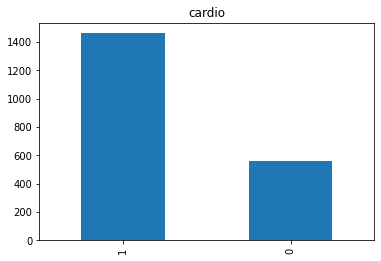

In [17]:
cardio_outlier = dataset_outlier['cardio'].value_counts()
cardio_outlier.plot(kind='bar', title='cardio')

cardio_outlier

menghapus data outlier. kita disini bisa memkai fungsi drop.

In [18]:
df = df.drop(dataset_outlier.index)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
69994,58.0,1,165,80.0,150,80,1,1,0,0,1,1
69995,53.0,2,168,76.0,120,80,1,1,1,0,1,0
69997,52.0,2,183,105.0,180,90,3,1,0,1,0,1
69998,61.0,1,163,72.0,135,80,1,2,0,0,0,1


Text(0.5, 1.0, 'distribution of Height after cleaning')

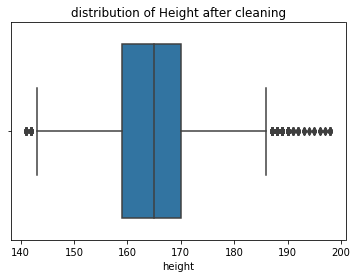

In [19]:
sns.boxplot(x=df['height'])
plt.title('distribution of Height after cleaning')

Text(0.5, 1.0, 'distribution of Weight after cleaning')

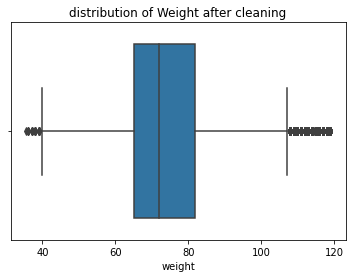

In [20]:
sns.boxplot(x=df['weight'])
plt.title('distribution of Weight after cleaning')

Cek jumlah target

Text(0.5, 1.0, 'distribution of Systolic after cleaning')

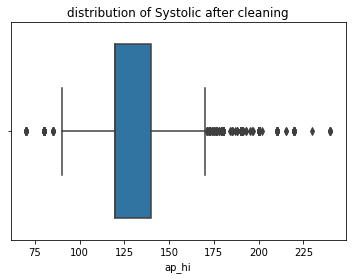

In [21]:
sns.boxplot(x=df['ap_hi'])
plt.title('distribution of Systolic after cleaning')

Text(0.5, 1.0, 'distribution of Dyastolic after cleaning')

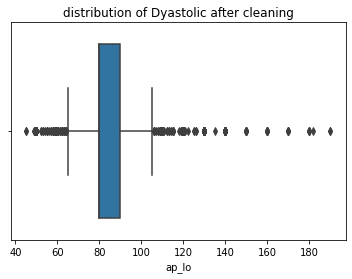

In [22]:
sns.boxplot(x=df['ap_lo'])
plt.title('distribution of Dyastolic after cleaning')

1    32531
0    31633
Name: cardio, dtype: int64

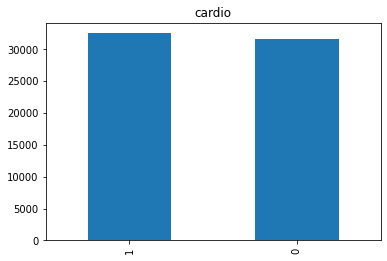

In [23]:
cardio = df['cardio'].value_counts()
cardio.plot(kind='bar', title='cardio')
cardio

dataset sudah kita bersikan dari data yang ambigu

### Univariate Analysis

Membagi data menjadi data numerik dan data kategorical

In [24]:
numerical_features = ['age','height', 'weight', 'ap_hi', 'ap_lo']
categorical_features = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']

Categorical Feature

melakukan analysis pada data kategori dengan visualisasi data



*   gender

membandingkan pengidap Cardiovascular berdasarkan gender


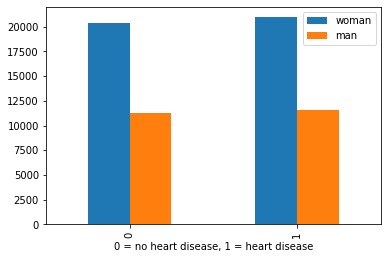

In [25]:

pd.crosstab(df['cardio'], df['gender']).plot(kind = 'bar')
plt.xlabel('0 = no heart disease, 1 = heart disease')
plt.legend(['woman','man'])
plt.show()

   jumlah sampel  persentase
1          41306        64.4
2          22858        35.6


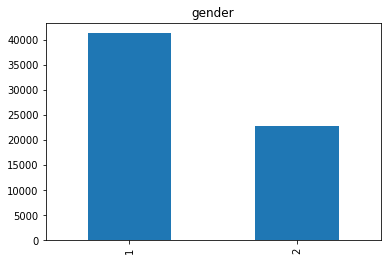

In [26]:
feature = categorical_features[0]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_new = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_new)
count.plot(kind='bar', title=feature);

Dilihat dari data bahwa 64,4% dari dataset berjenis kelamin perempuan dan 35 % laki-laki

dengan jumlah penderita CVD lebih banyak perempuan



*   cholesterol



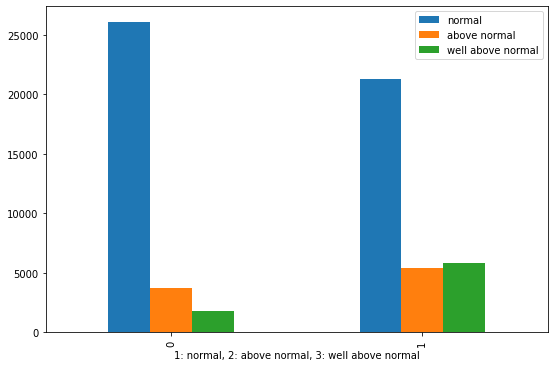

In [27]:

pd.crosstab(df['cardio'], df['cholesterol']).plot(kind = 'bar', figsize=(9,6))
plt.xlabel('1: normal, 2: above normal, 3: well above normal')
plt.legend(['normal','above normal', 'well above normal'])
plt.show()

   jumlah sampel  persentase
1          47350        73.8
2           9116        14.2
3           7698        12.0


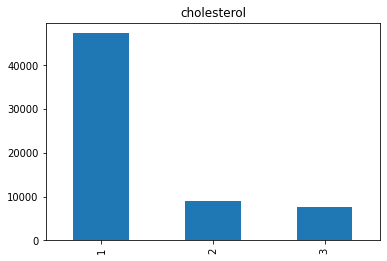

In [28]:
feature = categorical_features[1]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_new = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_new)
count.plot(kind='bar', title=feature);

pada kolom cholesterol, dapat dilihat bahwa 73,8 % tidak mempunyai masalah pada kolesterol, tetapi pada penderita CVD dibarengi dengan peningkatan pada jumlah pengidap kolesterol. 



*   gluc



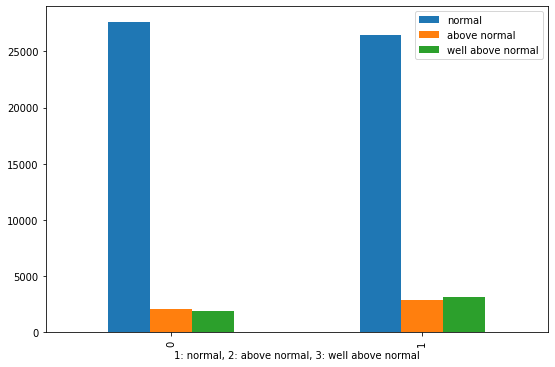

In [29]:
pd.crosstab(df['cardio'], df['gluc']).plot(kind = 'bar', figsize=(9,6))
plt.xlabel('1: normal, 2: above normal, 3: well above normal')
plt.legend(['normal','above normal', 'well above normal'])
plt.show()

   jumlah sampel  persentase
1          54124        84.4
3           5085         7.9
2           4955         7.7


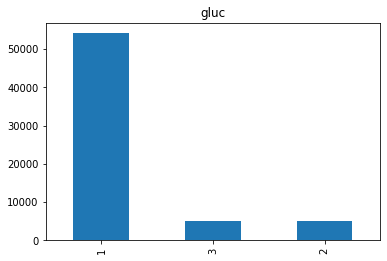

In [30]:
feature = categorical_features[2]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_new = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_new)
count.plot(kind='bar', title=feature);

Data berupa 84,4% dengan penderita kadar glucosa yang normal

tetapi pada data menunjukkan pada penderita CVD, ada peningkatan glucosa  



*   smoke



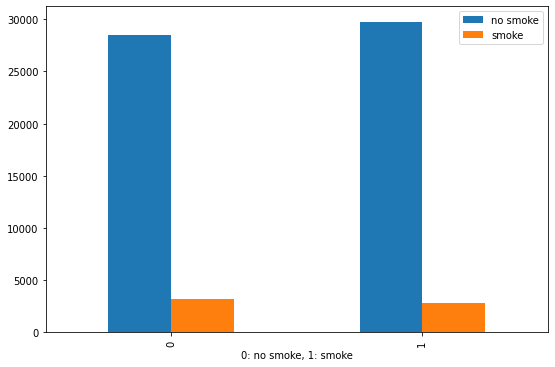

In [31]:
pd.crosstab(df['cardio'], df['smoke']).plot(kind = 'bar', figsize=(9,6))
plt.xlabel('0: no smoke, 1: smoke')
plt.legend(['no smoke','smoke'])
plt.show()

   jumlah sampel  persentase
0          58228        90.7
1           5936         9.3


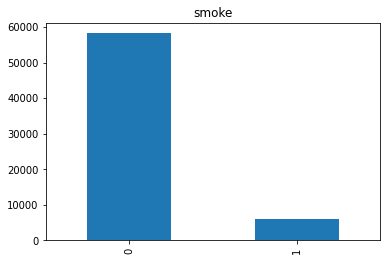

In [32]:
feature = categorical_features[3]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_new = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_new)
count.plot(kind='bar', title=feature);

data sampel menunjukkan 90,7% tidak merokok, dan merokok tidak berkontribusi pada data yang signifikan



*   alco



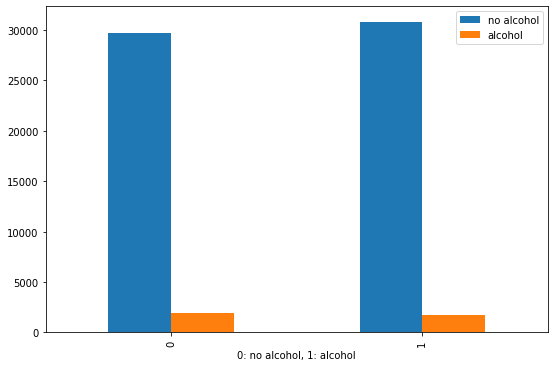

In [33]:
pd.crosstab(df['cardio'], df['alco']).plot(kind = 'bar', figsize=(9,6))
plt.xlabel('0: no alcohol, 1: alcohol')
plt.legend(['no alcohol','alcohol'])
plt.show()

   jumlah sampel  persentase
0          60543        94.4
1           3621         5.6


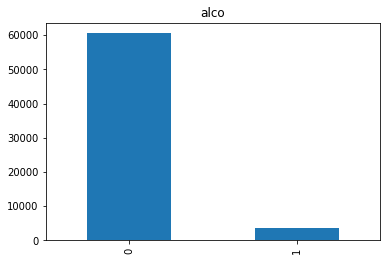

In [34]:
feature = categorical_features[4]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_new = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_new)
count.plot(kind='bar', title=feature);

data 94,4% tidak minum alkohol, dan kurang dari 300 orang penderita CVD akibat mengkonsumsi alkohol



*   active



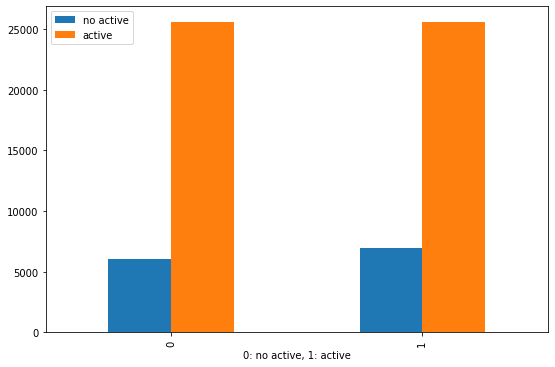

In [35]:
pd.crosstab(df['cardio'], df['active']).plot(kind = 'bar', figsize=(9,6))
plt.xlabel('0: no active, 1: active')
plt.legend(['no active','active'])
plt.show()

   jumlah sampel  persentase
1          51161        79.7
0          13003        20.3


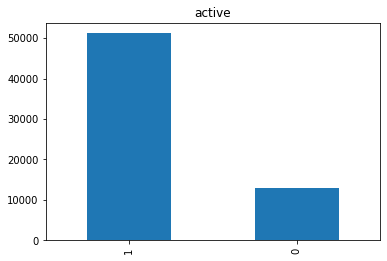

In [36]:
feature = categorical_features[5]
count = df[feature].value_counts()
percent = 100*df[feature].value_counts(normalize=True)
df_new = pd.DataFrame({'jumlah sampel':count, 'persentase':percent.round(1)})
print(df_new)
count.plot(kind='bar', title=feature);

dapat disimpulkan bahwa punya kegiatan yang aktif tidak terlalu banyak mempengaruhi sesorang terkena serangan jantung

Berdasarkan visualisasi data tersebut diatas dapat disimpulkan bahwa kenaikan kolesterol dan glukosa dalam darah memberikan efek pada kemungkinan terjadi serangan jantung pada pasien



>Selanjutnya kita akan observasi penyakit jantung berdasarkan umur, tinggi berat, dan tekanan darah



Observations cardio by age


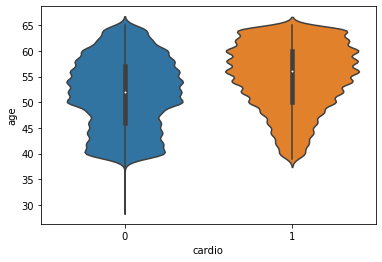

In [37]:
sns.violinplot(x=df.cardio, y= df.age)
print("Observations cardio by age");

Observations cardio by height


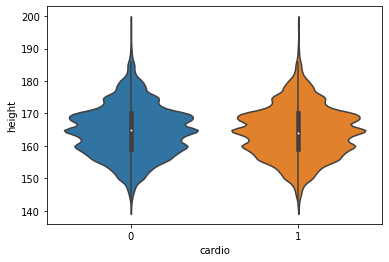

In [38]:
sns.violinplot(x=df.cardio, y= df.height)
print("Observations cardio by height");

Observations cardio by weight


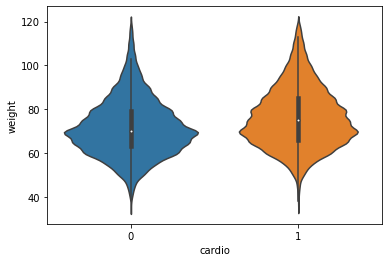

In [39]:
sns.violinplot(x=df.cardio, y= df.weight)
print("Observations cardio by weight");

Observations cardio by Systolic blood pressure


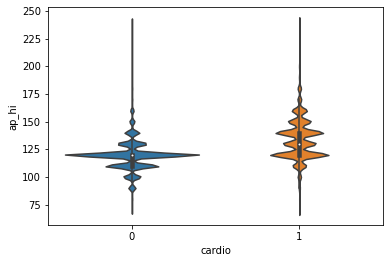

In [40]:
sns.violinplot(x=df.cardio, y= df.ap_hi)
print("Observations cardio by Systolic blood pressure");

Observations cardio by Dyastolic blood pressure


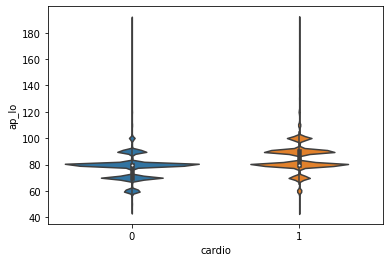

In [41]:
sns.violinplot(x=df.cardio, y= df.ap_lo)
print("Observations cardio by Dyastolic blood pressure");

Dari visualisasi tersebut dapat kita simpulkan bahwa penyakit jantung lebih banyak terjadi di umur lebi dari 50 tahun.

Demikian juga pada tekanan darah yang lebih tinggi dapat membuat kemungkinan seseorang terkena serangan jantung lebih besar.

### Multivariate Analysis

Corelation Score

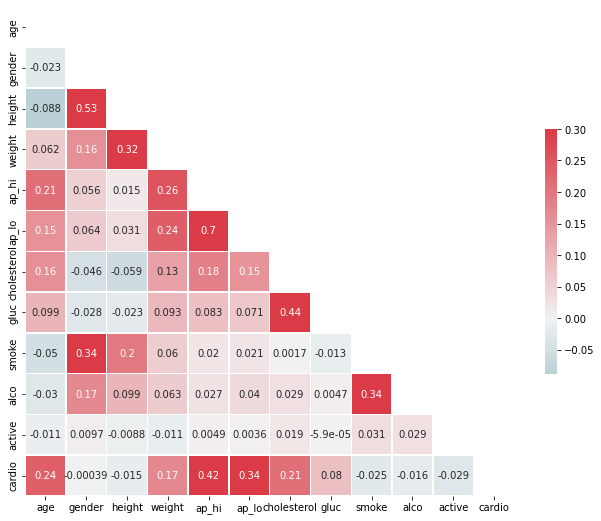

In [42]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

dari corelation metric tersebut dapat kita ketahui bahwa yang paling berperan menyebabkan sesorang terkena serangan jantung adalah umur, tekanan darah, kolesterol, dan berat badan.

### Data Preocessing

Setelah kita melihat dan mengamati persebaran data, kita akan melakukan penyetaraan data, yaitu proses untuk membuat nilai pada tiap kolom mempunyai nilai dalam rentang yang sama, sehingga model kita akan mudah melakukan proses training.

In [43]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,2,168,62.0,110,80,1,1,0,0,1,0
1,55.0,1,156,85.0,140,90,3,1,0,0,1,1
2,52.0,1,165,64.0,130,70,3,1,0,0,0,1
3,48.0,2,169,82.0,150,100,1,1,0,0,1,1
4,48.0,1,156,56.0,100,60,1,1,0,0,0,0


Mengubah gender dari "1:women, 2:men", menjadi "0:women, 1:men"

In [44]:
df['gender'] = df.gender.replace([1,2], [0,1])
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,1,168,62.0,110,80,1,1,0,0,1,0
1,55.0,0,156,85.0,140,90,3,1,0,0,1,1
2,52.0,0,165,64.0,130,70,3,1,0,0,0,1
3,48.0,1,169,82.0,150,100,1,1,0,0,1,1
4,48.0,0,156,56.0,100,60,1,1,0,0,0,0


Melakukan proses encoding pada data tipe kategori. Ini bertujuan untuk mempermudah model dalam memproses data.
  Sebelumnya pada data kategori, yaitu cholesterol, gluc, smoke, alco, dan active terdiri dari dua maupun tiga kategori dalam satu kolom. dengan encoding kita akan membuat masing masing kategori menjadi kolom baru, dan kolom yang memuat kategori tersebut akan bernilai 1, sedangkan yang tidak akan bernilai 0.
  Dengan encoding diharapkan nantinya akan memudahkan model untuk melakukan proses training dan evaluasi.
  pada scikit learn tersedia fitur OneHotEncoder yang berguna untuk melakukan proses encoding.

one hot encoding data categorical yang memiliki 3 value, yaitu cholesterol dan gluc

In [45]:
df['cholesterol']=df['cholesterol'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
df['gluc']=df['gluc'].map({ 1: 'normal', 2: 'above normal', 3: 'well above normal'})
encoding_features = pd.get_dummies(df[['cholesterol','gluc']],drop_first=True)
df = pd.concat([df,encoding_features],axis=1)
df.drop(['cholesterol','gluc'],axis=1,inplace=True)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cardio,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
0,50.0,1,168,62.0,110,80,0,0,1,0,1,0,1,0
1,55.0,0,156,85.0,140,90,0,0,1,1,0,1,1,0
2,52.0,0,165,64.0,130,70,0,0,0,1,0,1,1,0
3,48.0,1,169,82.0,150,100,0,0,1,1,1,0,1,0
4,48.0,0,156,56.0,100,60,0,0,0,0,1,0,1,0


### Split Data

membagi data menjadi dua jenis yaitu data train dan data test.
data train akan saya gunakan pada tahap training, dan data test akan saya gunakan pada tahap evaluasi.
Proses membagi data menggunakan fungsi train_test_split dari library scikit learn.

In [46]:
from sklearn.model_selection import train_test_split
X = df.drop(["cardio"],axis =1)
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 56)

Cek proporsi data

In [47]:
print(f'Total of dataset: {len(X)}')
print(f'total off train dataset: {len(X_train)}')
print(f'Total of  test dataset: {len(X_test)}')

Total of dataset: 64164
total off train dataset: 51331
Total of  test dataset: 12833


Melihat perbandingan label "cardio" dan "no cardio" pada y_train dan y_test dengan matplotlib

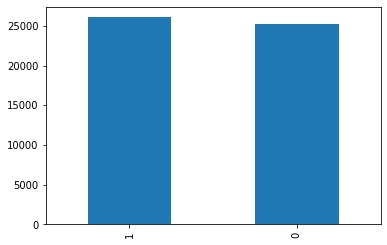

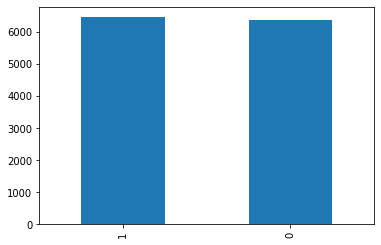

In [51]:
label_train = y_train.value_counts()
label_test = y_test.value_counts()
plt.figure(0)
label_train.plot(kind='bar')
plt.figure(1)
label_test.plot(kind='bar')

### Standarisasi

Setelah melakukan proses encoding pada setiap data kategori maka akan membentuk nilai 1 dan 0 pada masing masing kategori, selanjutnya saya melakukan proses standarisasi pada data numerik.
  Standardisasi adalah teknik transformasi yang paling umum digunakan dalam tahap persiapan pemodelan. Untuk data numerik, kita tidak akan melakukan transformasi dengan one-hot-encoding seperti pada fitur kategori. Kita akan menggunakan teknik StandarScaler dari library Scikitlearn.
  StandardScaler melakukan proses standarisasi fitur dengan mengurangkan mean (nilai rata-rata) kemudian membaginya dengan standar deviasi untuk menggeser distribusi. StandardScaler menghasilkan distribusi dengan standar deviasi sama dengan 1 dan mean sama dengan 0. Sekitar 68% dari nilai akan berada di antara -1 dan 1.


In [52]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,age,height,weight,ap_hi,ap_lo
263,0.092024,0.071676,0.441451,0.179872,0.865996
20718,0.385867,-0.563104,2.293545,0.179872,-0.149331
10674,-0.201820,0.579499,2.589880,0.766732,-0.149331
53810,-0.789506,-0.943972,-0.447554,1.353593,0.865996
67647,-0.495663,0.960367,-1.114308,-0.993849,-0.149331


In [53]:
X_train

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
263,0.092024,0,0.071676,0.441451,0.179872,0.865996,0,0,1,1,0,1,0
20718,0.385867,1,-0.563104,2.293545,0.179872,-0.149331,0,0,1,0,1,0,1
10674,-0.201820,0,0.579499,2.589880,0.766732,-0.149331,0,0,0,0,1,0,1
53810,-0.789506,0,-0.943972,-0.447554,1.353593,0.865996,0,0,1,1,0,1,0
67647,-0.495663,1,0.960367,-1.114308,-0.993849,-0.149331,1,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27400,0.973554,0,-0.182236,-0.817973,-0.406988,-0.149331,0,0,0,0,1,0,1
50108,1.267398,0,-0.563104,1.182288,0.766732,0.865996,0,0,1,0,0,0,1
3381,-1.964880,0,-1.451795,-1.262475,-0.406988,-0.149331,0,0,1,1,0,1,0
35408,-0.348741,1,0.706455,-0.373470,-0.406988,-0.149331,0,0,1,1,0,1,0


cek keseimbangan jumlah target 

In [54]:
y_train.value_counts()

1    26067
0    25264
Name: cardio, dtype: int64

# Prediksi

Karena disini adalah mengklasifikasikan apakah pasien ada kemungkinan mengidap kardiovaskular maka saya menggunakan algoritma klasifikasi dari Random Forest Classifier dari scikit learn.
Random Forest bisa dipakai untuk klasifikasi maupun regresi. Random Forest termasuk kedalam kelompok ensemble(group). model ensemble adalah kelompok model yang terdiri dari beberapa model yang bekerja secara bersama-sama. Dari setiap model yang ada didalam kelompok ensemble ini akan membuat prediksi secara independen sehingga prediksi dari satu model dengan model yang lain tentu akan berbeda. Prediksi dari setiap model ini akan digabungkan untuk menjadi prediski akhir model nesemble.

ada 2 pendekatan dalam model ensemble, yaitu bagging dan boosting. teknik bagging sangat cocok untuk model Decision Tree. Karena sejatinya Random Forest tersusun atas kumpuan dari model Decision Tree maka, model ini akan memakai teknik bagging. Bagging atau bootstrap aggregating adalah teknik yang melatih model dengan sampel random. Dalam teknik bagging, sejumlah model dilatih dengan teknik sampling with replacement (proses sampling dengan penggantian). Ketika kita melakukan sampling with replacement, sampel dengan nilai yang berbeda bersifat independen. Artinya, nilai suatu sampel tidak mempengaruhi sampel lainnya. Akibatnya, model yang dilatih akan berbeda antara satu dan lainnya.
Hasil prediksi akhir adalah jumlah terbanyak yang diprediksi oleh kumpulan model Decision Tree.

Pada tahap training saya mendapatkan akurasi, saya menggunakan metrik accurasi score dari scikit learn dan didapatkan akurasi sebesar 0,82, dan untuk menghitung loss saya menggunakan metrik mean squared error dan didapatkan error sebesar 0,17.

Mengenai metrics acurracy_score dan mean_squared_error akan saya jelaskan pada tahap evaluasi.

In [56]:
# Impor library yang dibutuhkan
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.ensemble import RandomForestClassifier

# buat model prediksi
clf = RandomForestClassifier(n_estimators=300, max_depth=16, random_state=55, n_jobs=-1)
clf.fit(X_train, y_train)
acc = accuracy_score(clf.predict(X_train), y_train)
print('score : ', acc)
error = mean_squared_error(y_true=y_train, y_pred=clf.predict(X_train))
print('error : ', error)

score :  0.8246478736046444
error :  0.17535212639535563


# Evaluasi


Pada tahap evaluasi saya memakai data test yang berbeda dengan data training.

metrik evaluasi yang digunakan juga sama seperti pada tahap training yaitu memakai metrik accurasi score dan untuk menghitung loss menggunakan metrik mean squared error.

- Accuracy_score adalah sebuah metric evaluasi dengan membandingkan jumlah prediksi yang benar dengan jumlah keseluruhan data.
  Jika kita melihat pada tabel confusion metric yang ada di bawah,
dapat kita lihat ada 2 label, yaitu true label (label yang sesungguhnya) dan predicted label (label yang diprediksi oleh model). Accuracy_score akan membandingkan jumlah label 1 yang diprediksi 1 ditambah jumlah label 0 yang diprediksi 0 di bagi jumlah keseluruhan data.


Dimana TP (True Positif) adalah label 1 yang diprediksi 1, dan TN (True Negatif) adalah label 0 yang diprediksi 0.

- mean_squared_error adalah sebuah metric yang digunakan untuk mengukur seberapa besar error / kesalahan dalam prediksi. Semakin kecil error maka performa dari model semakin baik. mean_squared_error akan menghitung selisih rata-rata nilai sebenarnya dengan nilai prediksi.

Dengan metric tersebut didapatkan akurasi sebesar 0,72 dan loss sebesar 0,27.

In [57]:
# standarisasi fitur numerik

X_test.loc[:, numerical_features] = scaler.transform(X_test[numerical_features])

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [58]:
X_test

,age,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,cholesterol_normal,cholesterol_well above normal,gluc_normal,gluc_well above normal
32404,1.267398,1,1.087323,0.071032,0.179872,-0.149331,0,0,0,1,0,0,0
27716,-1.964880,0,-0.309192,-1.040224,-0.406988,-0.149331,0,0,1,1,0,1,0
62231,1.120476,0,-1.197884,-0.521638,1.353593,0.865996,0,0,1,1,0,1,0
57034,1.561241,1,1.849059,0.367367,0.179872,-0.149331,0,1,1,1,0,1,0
17226,-0.201820,1,0.706455,-0.966140,-0.406988,-2.179985,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55373,1.267398,1,-0.436148,-1.558810,0.766732,1.881323,0,0,1,1,0,1,0
17239,0.826633,0,0.071676,-0.743889,-0.406988,-1.164658,0,0,1,1,0,1,0
27019,-1.377193,0,-0.055280,-1.336559,-0.993849,-1.164658,0,0,1,1,0,1,0
20407,-1.964880,0,0.579499,-0.299387,-0.406988,-0.149331,0,0,1,1,0,1,0


In [59]:
acc_val = accuracy_score(clf.predict(X_test), y_test)
print('accuracy in validation : ', acc_val)

error_val = mean_squared_error(y_true=y_test, y_pred=clf.predict(X_test))
print('error in validation : ', error_val)

accuracy in validation :  0.7246162237980207
error in validation :  0.2753837762019793


Dalam pelatihan model di atas kita mendapatkan akurasi 0,82 pada data train dan 0,74 pada data test

sedangkan errornya kita mendapatkan 0,17 pada data train dan 0,27 pada data test

# confusion metrics

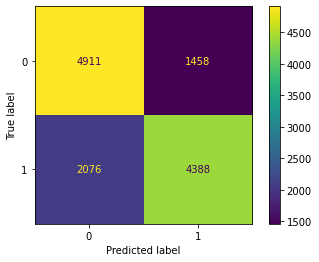

In [60]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X_test, y_test, values_format='d')

# prediksi

In [61]:
predict_data = X_test.iloc[:20].copy()
pred_dict = {'y_true':y_test[:20]}
pred_dict['prediksi_RandomForestClassifier'] = clf.predict(predict_data)
 
pd.DataFrame(pred_dict)



,y_true,prediksi_RandomForestClassifier
32404,1,1
27716,0,0
62231,0,1
57034,1,0
17226,1,0
62646,0,0
45227,0,0
7463,1,1
21363,0,1
25596,0,0


In [62]:
acc_pred = accuracy_score(clf.predict(predict_data), y_test[:20])
print('accuracy in prediction : ', acc_pred)

error_pred = mean_squared_error(y_true=y_test[:20], y_pred=clf.predict(predict_data))
print('error in prediction : ', error_pred)

accuracy in prediction :  0.65
error in prediction :  0.35


## Penutup

Demikian adalah rangkuman dari tahapan Prediksi penyakit kardiovaskular yang saya lakukan. Prediksi masih bisa diperbaiki dengan melakukan hypertuning parameter ataupun memperbaiki dengan memeperbaiki kualitas data.